##  PVP feature

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import os

def roc(test, pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
 
    print ('ROC_AUC: %.6f' %roc_auc[1])
    plt.figure()
    
    plt.plot(fpr[1], tpr[1], lw=2, label='ROC curve (area = %0.4f)' % roc_auc[1])
 
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic : AUC={0:0.3f}'.format(roc_auc[1]))
    plt.show()

    
def roc_print(test, pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
 
    return roc_auc[1]    


def pr(test, pred):
	lw =2
	from sklearn.metrics import precision_recall_curve
	from sklearn.metrics import average_precision_score
	# Compute Precision-Recall and plot curve
	precision = dict()
	recall = dict()
	average_precision = dict()
	for i in range(2):
	    precision[i], recall[i], _ = precision_recall_curve(test,
	                                                        pred)
	    average_precision[i] = average_precision_score(test, pred)

	# Compute micro-average ROC curve and ROC area
	precision["micro"], recall["micro"], _ = precision_recall_curve(test.ravel(),
	    pred.ravel())
	average_precision["micro"] = average_precision_score(test, pred,
	                                                     average="micro")


	# Plot Precision-Recall curve
	plt.clf()
	plt.plot(recall[0], precision[0], lw=lw, color='navy',
	         label='Precision-Recall curve')
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.ylim([0.0, 1.0])
	plt.xlim([0.0, 1.0])
	plt.title('Precision-Recall: Average Pricision={0:0.3f}'.format(average_precision[0]))
	plt.legend(loc="lower left")
	plt.show()


## Dataset

In [33]:
## Data for Model 1

df = pd.read_csv('PVP_new_data.csv')

df = df.sort_values(['OMIM'])
        
df_test1 = df.iloc[:8000, :]
df_test2 = df.iloc[96000:, :]

df_train = df.iloc[8000:96000, :]


df_test = pd.concat([df_test1,df_test2])
        
df_train.to_csv('PVP_new_data_train.csv', index = None)
df_test.to_csv('PVP_new_data_test.csv', index = None)

df_train.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
df_test.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)


df_train.to_csv('PVP_feature_train.csv', index = None, header = None)
df_test.to_csv('PVP_feature_test.csv', index = None, header = None)


/home/medhij/anaconda2/envs/tensorflowenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/medhij/anaconda2/envs/tensorflowenv/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
##Test for Model 2
### To remove BRCA

df_nb_train = pd.read_csv('PVP_new_data_train.csv')
df_new_nb_train = df_nb_train[df_nb_train.Gene.str.contains("BRCA") == False]


df_nb_test = pd.read_csv('PVP_new_data_test.csv')
df_new_nb_test = df_nb_test[df_nb_test.Gene.str.contains("BRCA") == False]

df_new_nb_train.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
df_new_nb_test.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)

df_new_nb_train.to_csv('PVP_features_no_brca_train.csv', index = None, header =None)
df_new_nb_test.to_csv('PVP_features_no_brca_test.csv', index = None, header =None)

/home/medhij/anaconda2/envs/tensorflowenv/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/medhij/anaconda2/envs/tensorflowenv/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Models

['acc', 'loss', 'val_acc', 'val_loss']


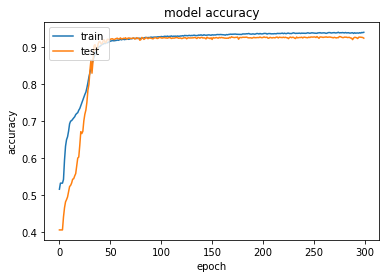

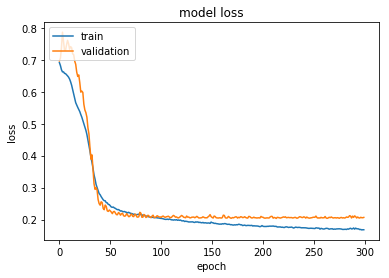

In [52]:
##### Training  #####


# Visualize training history
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = numpy.loadtxt("PVP_features_no_brca_train.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,1:68]
Y = dataset[:,0]

# create model
model = Sequential()

# model.add(input_shape=(80,))
model.add(Dense(80, input_dim=67,  kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(80, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

## Model Name
filepath="model1.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=.20, epochs=300, batch_size=20000, callbacks = callbacks_list, verbose=0, initial_epoch=0)
# list all data in history
print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model1_auccuracy.png', bbox_inches='tight')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('model1_loss.png', bbox_inches='tight')

## Test

Created model and loaded weights from file
17312/17532 [============================>.] - ETA: 0s  

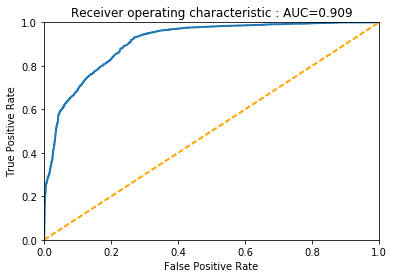

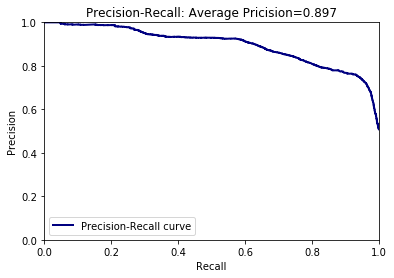

In [54]:
##Test


dataset_test = numpy.loadtxt("PVP_feature_test.csv", delimiter=",")

# split into input (X) and output (Y) variables
X_test = dataset_test[:,1:68]
Y_test = dataset_test[:,0]


# load weights
model.load_weights("model1.weights.best.hdf5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Created model and loaded weights from file")


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X_test, Y_test, verbose=1)

y_score = model.predict_proba(X_test)

print(model.metrics_names)
print(scores)

roc(Y_test, y_score)
pr(Y_test, y_score)



# Cell Data

In [14]:
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
        dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
        dataframe[column] = dataframe[column].fillna(0)

    return dataframe

columns1 = ['adipose tissue', 'adrenal gland', 'brain', 'heart', 'kidney',
       'liver', 'lung', 'ovary', 'pancreas', 'sigmoid colon',
       'small intestine', 'spleen', 'testis']

columns2 = ['t0', 't1', 't2' , 't3' , 't4' , 't5' , 't6' , 't7' , 't8' , 't9' , 't10' , 't11' , 't12']

In [18]:
## Data Prep ###

## Not Normalized ##

df_nb_train = pd.read_csv('PVP_new_data_train.csv')
df_new_nb_train = df_nb_train[df_nb_train.Gene.str.contains("BRCA") == False]


df_nb_test = pd.read_csv('PVP_new_data_test.csv')
df_new_nb_test = df_nb_test[df_nb_test.Gene.str.contains("BRCA") == False]

df_human = pd.read_table('../arff/tissue_data_human.tsv')
del df_human['Gene ID']

final_train1 = pd.merge(df_nb_train, df_human, how='left', on=['Gene', 'Gene'])
final_test1 = pd.merge(df_nb_test, df_human, how='left', on=['Gene', 'Gene'])


final_train2 = pd.merge(df_new_nb_train, df_human, how='left', on=['Gene', 'Gene'])
final_test2 = pd.merge(df_new_nb_test, df_human, how='left', on=['Gene', 'Gene'])

final_train1.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
final_test1.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)


final_train2.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
final_test2.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)

recode_empty_cells(final_train1, columns1)
recode_empty_cells(final_train2, columns1)

recode_empty_cells(final_test1, columns1)
recode_empty_cells(final_test2, columns1)


final_train1.to_csv('tissue_brca_train.csv', index =None, header=None)
final_test1.to_csv('tissue_brca_test.csv', index =None, header=None)

final_train2.to_csv('tissue_no_brca_train.csv', index =None, header=None)
final_test2.to_csv('tissue_no_brca_test.csv', index =None, header=None)



In [19]:
#### Normalized ####

df_nb_train = pd.read_csv('PVP_new_data_train.csv')
df_new_nb_train = df_nb_train[df_nb_train.Gene.str.contains("BRCA") == False]


df_nb_test = pd.read_csv('PVP_new_data_test.csv')
df_new_nb_test = df_nb_test[df_nb_test.Gene.str.contains("BRCA") == False]

df_human = pd.read_csv('row_scaled_tissue.csv')

final_train1 = pd.merge(df_nb_train, df_human, how='left', on=['Gene', 'Gene'])
final_test1 = pd.merge(df_nb_test, df_human, how='left', on=['Gene', 'Gene'])


final_train2 = pd.merge(df_new_nb_train, df_human, how='left', on=['Gene', 'Gene'])
final_test2 = pd.merge(df_new_nb_test, df_human, how='left', on=['Gene', 'Gene'])

final_train1.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
final_test1.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)


final_train2.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)
final_test2.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene' , 'OMIM'], axis =1, inplace = True)

recode_empty_cells(final_train1, columns2)
recode_empty_cells(final_train2, columns2)

recode_empty_cells(final_test1, columns2)
recode_empty_cells(final_test2, columns2)


final_train1.to_csv('norm_tissue_brca_train.csv', index =None, header=None)
final_test1.to_csv('norm_tissue_brca_test.csv', index =None, header=None)

final_train2.to_csv('norm_tissue_no_brca_train.csv', index =None, header=None)
final_test2.to_csv('norm_tissue_no_brca_test.csv', index =None, header=None)



### Train

doing stuff!
Epoch 00000: val_loss improved from inf to 0.76864, saving model to model4.weights.best.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss improved from 0.76864 to 0.74781, saving model to model4.weights.best.hdf5
Epoch 00003: val_loss improved from 0.74781 to 0.71320, saving model to model4.weights.best.hdf5
Epoch 00004: val_loss improved from 0.71320 to 0.71260, saving model to model4.weights.best.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss improved from 0.71260 to 0.70821, saving model to model4.weights.best.hdf5
Epoch 00010: val_loss improved from 0.70821 to 0.69752, saving model to model4.weights.best.hdf5
Epoch 00011: val_loss improved from 0.69752 to 0.68860, saving model to model4.weights.best.hdf5
Epoch 00012: val_loss improved from 0.68860 to 0.68343, saving model to model4.weights.best.hdf5
Epoch 00013: val_loss did

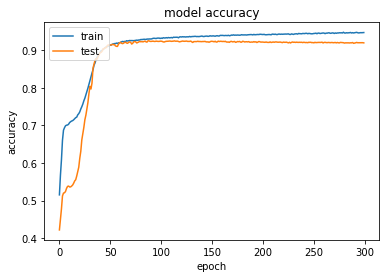

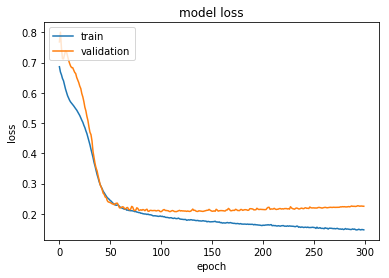

In [54]:
##### Training  #####


# Visualize training history
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = numpy.loadtxt("norm_tissue_no_brca_train.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,1:81]
Y = dataset[:,0]

# create model
model = Sequential()

# model.add(input_shape=(80,))
model.add(Dense(160, input_dim=80,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(160, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

print('doing stuff!')
## Model Name
filepath="model4.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X, Y, validation_split=.20, epochs=300, batch_size=20000, callbacks = callbacks_list, verbose=0, initial_epoch=0)
# list all data in history
print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Created model and loaded weights from file
11520/11704 [============================>.] - ETA: 0s 

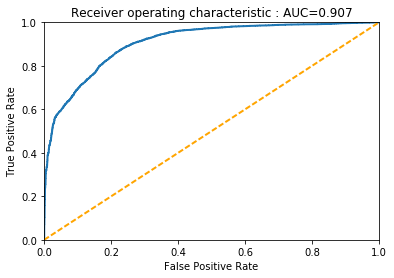

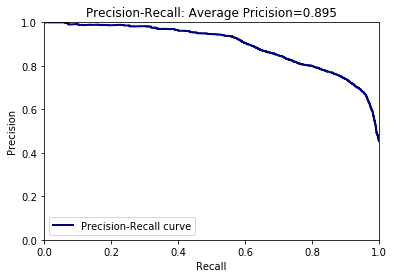

In [56]:
#### Test ####


dataset_test = numpy.loadtxt("norm_tissue_no_brca_test.csv", delimiter=",")

# split into input (X) and output (Y) variables
X_test = dataset_test[:,1:81]
Y_test = dataset_test[:,0]


# load weights
model.load_weights("model4.weights.best.hdf5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Created model and loaded weights from file")


# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X_test, Y_test, verbose=1)

y_score = model.predict_proba(X_test)

print(model.metrics_names)
print(scores)

roc(Y_test, y_score)
pr(Y_test, y_score)


## Cell column

In [48]:
df_tissue = pd.read_table('../arff/tissue_data_human.tsv')
#del df_tissue['Gene ID']

In [37]:
df_tissue

,Gene,adipose tissue,adrenal gland,brain,heart,kidney,liver,lung,ovary,pancreas,sigmoid colon,small intestine,spleen,testis
0,TSPAN6,12.0,6.0,2.0,2.0,18.0,17.0,10.0,17.0,7.0,6.0,19.0,5.0,15.0
1,TNMD,9.0,0.0,0.0,0.0,0.9,0.0,0.0,1.0,0.1,0.1,0.0,0.0,0.2
2,DPM1,21.0,44.0,23.0,22.0,27.0,15.0,55.0,17.0,26.0,20.0,22.0,41.0,37.0
3,SCYL3,2.0,3.0,1.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,4.0,4.0,4.0
4,C1orf112,1.0,0.5,3.0,0.4,0.4,0.7,1.0,1.0,0.7,0.8,0.4,2.0,7.0
5,FGR,11.0,2.0,0.6,1.0,0.5,2.0,34.0,2.0,3.0,3.0,0.1,53.0,1.0
6,CFH,18.0,14.0,2.0,6.0,6.0,296.0,25.0,31.0,4.0,8.0,0.1,6.0,7.0
7,FUCA2,16.0,32.0,18.0,11.0,32.0,18.0,34.0,27.0,19.0,8.0,32.0,19.0,12.0
8,GCLC,6.0,11.0,7.0,4.0,5.0,14.0,6.0,6.0,6.0,7.0,13.0,16.0,5.0
9,NFYA,6.0,8.0,12.0,3.0,3.0,4.0,6.0,10.0,5.0,4.0,7.0,8.0,34.0


In [49]:
df_tissue['Gene'].value_counts()


Y_RNA            754
Metazoa_SRP      166
U3                55
uc_338            36
snoU13            32
SNORA70           30
SNORA31           27
SNORA40           22
U8                22
SNORA25           20
U2                17
5S_rRNA           15
SNORA48           13
SNORA51           13
U1                13
SNORA26           11
SNORA63           11
U6                 9
pRNA               9
SNORA11            8
SNORA67            8
SNORA75            8
SNORA72            8
SNORA18            8
SNORA62            7
SCARNA20           7
SNORD56            7
U7                 7
SNORA74            7
7SK                7
                ... 
CTA-31J9.2         1
RFTN1P1            1
CNTNAP2            1
CNTNAP4            1
MAP7D2             1
RP5-1085F17.4      1
MAP7D3             1
IGHVII-53-1        1
USP27X             1
ZIK1P1             1
RP11-119K6.6       1
RNU6-100P          1
RP11-371M22.1      1
RP11-51F16.1       1
AC004066.3         1
AC004066.2         1
RP11-51F16.9 

In [50]:
df_tissue[df_tissue.Gene.str.contains('snoU13')]

,Gene ID,Gene,adipose tissue,adrenal gland,brain,heart,kidney,liver,lung,ovary,pancreas,sigmoid colon,small intestine,spleen,testis
34939,ENSG00000238295,snoU13,0.0,0.0,0.0,0.3,0.0,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.0
34944,ENSG00000238311,snoU13,0.2,0.3,0.0,0.0,0.0,0.2,0.0,0.3,0.6,0.2,0.1,0.0,0.4
34945,ENSG00000238316,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34948,ENSG00000238326,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34958,ENSG00000238371,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34959,ENSG00000238372,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0
34965,ENSG00000238387,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34979,ENSG00000238440,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34991,ENSG00000238485,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35013,ENSG00000238570,snoU13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
